# Sección 7: Definición de la Derivada

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, limit, diff, lambdify, sin

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


## 1. Concepto Fundamental: Derivada como Pendiente

**Definición formal**:
La derivada de una función $f(x)$ en un punto $x = a$ es:

$$f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

Alternativamente:

$$f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}$$

### Visualización de Rectas Secante y Tangente


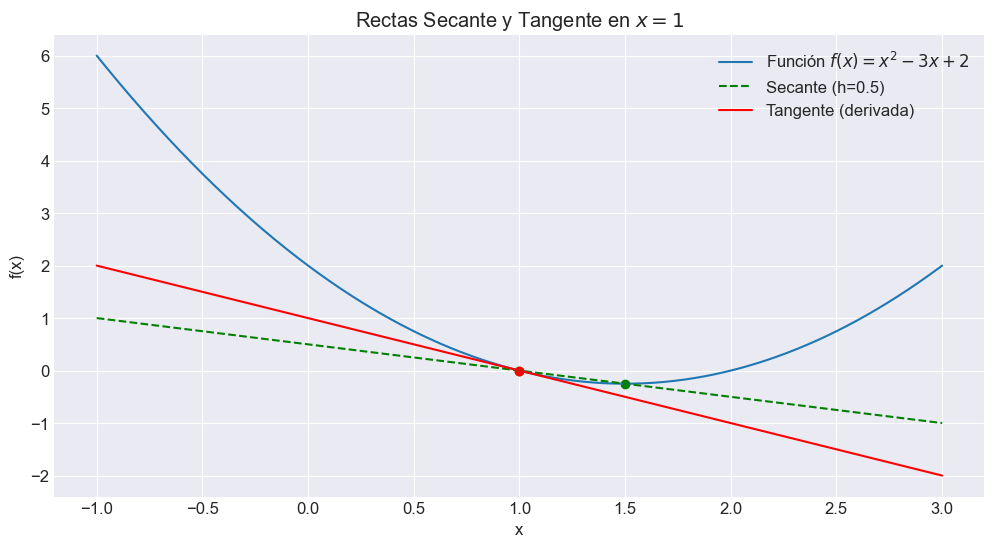

In [3]:
def plot_tangent_secant(f, a, h=1.0):
    x = symbols('x')
    x_vals = np.linspace(a-2, a+2, 500)
    f_lamb = lambdify(x, f, 'numpy')
    
    # Puntos para la recta secante
    x1, x2 = a, a+h
    y1, y2 = f_lamb(x1), f_lamb(x2)
    m_secant = (y2 - y1)/(x2 - x1)
    secant_line = y1 + m_secant*(x_vals - x1)
    
    # Recta tangente (derivada)
    df = diff(f, x)
    m_tangent = df.subs(x, a)
    tangent_line = y1 + m_tangent*(x_vals - x1)
    
    # Gráfico
    plt.plot(x_vals, f_lamb(x_vals), label=f'Función $f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, secant_line, 'g--', label=f'Secante (h={h:.1f})')
    plt.plot(x_vals, tangent_line, 'r-', label='Tangente (derivada)')
    plt.scatter([x1, x2], [y1, y2], color='green')
    plt.scatter(x1, y1, color='red')
    plt.title(f'Rectas Secante y Tangente en $x = {a}$')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo con función cuadrática
x = symbols('x')
f = x**2 - 3*x + 2
plot_tangent_secant(f, 1, h=0.5)


## 2. Cálculo de Derivadas Usando la Definición

Implementemos el proceso paso a paso:

In [4]:
def derivative_by_definition(f, x_point=None):
    x, h = symbols('x h')
    
    # Paso 1: Calcular f(x + h)
    f_xh = f.subs(x, x + h)
    
    # Paso 2: Construir el cociente diferencial
    diff_quotient = (f_xh - f)/h
    
    # Paso 3: Simplificar y calcular el límite
    simplified = diff_quotient.simplify()
    derivative = limit(simplified, h, 0)
    
    print("\nProceso de cálculo:")
    print(f"1. f(x + h) = {sp.latex(f_xh)}")
    print(f"2. Cociente diferencial = \frac{{{sp.latex(f_xh)} - {sp.latex(f)}}}{{h}}")
    print(f"3. Simplificado = {sp.latex(simplified)}")
    print(f"4. Derivada: f'(x) = {sp.latex(derivative)}")
    
    if x_point is not None:
        slope = derivative.subs(x, x_point)
        print(f"\nPendiente en x = {x_point}: f'({x_point}) = {slope}")
    
    return derivative

# Ejemplo del PDF
f_example = x**2 - 5*x + 6
print("=== Ejemplo del PDF ===")
deriv = derivative_by_definition(f_example, x_point=1)

# Ejemplo adicional
print("\n=== Ejemplo Adicional ===")
f_extra = 3*x**2 + 2*x - 1
derivative_by_definition(f_extra, x_point=0)


=== Ejemplo del PDF ===

Proceso de cálculo:
1. f(x + h) = - 5 h - 5 x + \left(h + x\right)^{2} + 6
2. Cociente diferencial = rac{- 5 h - 5 x + \left(h + x\right)^{2} + 6 - x^{2} - 5 x + 6}{h}
3. Simplificado = h + 2 x - 5
4. Derivada: f'(x) = 2 x - 5

Pendiente en x = 1: f'(1) = -3

=== Ejemplo Adicional ===

Proceso de cálculo:
1. f(x + h) = 2 h + 2 x + 3 \left(h + x\right)^{2} - 1
2. Cociente diferencial = rac{2 h + 2 x + 3 \left(h + x\right)^{2} - 1 - 3 x^{2} + 2 x - 1}{h}
3. Simplificado = 3 h + 6 x + 2
4. Derivada: f'(x) = 6 x + 2

Pendiente en x = 0: f'(0) = 2


6*x + 2

## 3. Aproximación Numérica de la Derivada

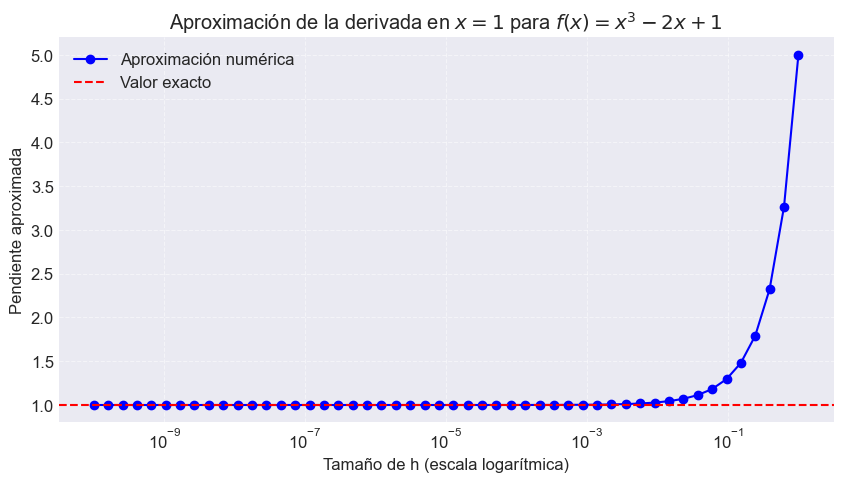

[np.float64(1.000000082740371),
 np.float64(0.9999995651062139),
 np.float64(1.0000000806002447),
 np.float64(1.000000111211664),
 np.float64(1.0000000933582338),
 np.float64(1.000000016858914),
 np.float64(0.9999999749218682),
 np.float64(1.0000000178806172),
 np.float64(1.0000000240768625),
 np.float64(1.0000000379978584),
 np.float64(1.0000000449315096),
 np.float64(1.0000000511431353),
 np.float64(1.000000089990049),
 np.float64(1.0000001336817845),
 np.float64(1.000000216356068),
 np.float64(1.0000003449356007),
 np.float64(1.0000005523842639),
 np.float64(1.000000883833992),
 np.float64(1.0000014143644589),
 np.float64(1.000002262901567),
 np.float64(1.0000036203543483),
 np.float64(1.000005792077921),
 np.float64(1.0000092665291578),
 np.float64(1.0000148251620093),
 np.float64(1.0000237182105578),
 np.float64(1.0000379458142996),
 np.float64(1.000060708097151),
 np.float64(1.0000971247799397),
 np.float64(1.0001553869242255),
 np.float64(1.000248599698013),
 np.float64(1.000397

In [5]:
def numerical_derivative(f, a, h_values):
    x = symbols('x')
    f_lamb = lambdify(x, f, 'numpy')
    exact_slope = diff(f, x).subs(x, a)
    
    approximations = []
    for h in h_values:
        slope = (f_lamb(a + h) - f_lamb(a))/h
        approximations.append(slope)
    
    # Gráfico de convergencia
    plt.figure(figsize=(10, 5))
    plt.plot(h_values, approximations, 'bo-', label='Aproximación numérica')
    plt.axhline(exact_slope, color='r', linestyle='--', label='Valor exacto')
    plt.xscale('log')
    plt.xlabel('Tamaño de h (escala logarítmica)')
    plt.ylabel('Pendiente aproximada')
    plt.title(f'Aproximación de la derivada en $x = {a}$ para $f(x) = {sp.latex(f)}$')
    plt.legend()
    plt.grid(True, which="both", linestyle='--', alpha=0.5)
    plt.show()
    
    return approximations

# Probamos con diferentes valores de h
h_vals = np.logspace(-10, 0, 50)
numerical_derivative(x**3 - 2*x + 1, 1, h_vals)


📈 ¿Qué ocurre en el gráfico?

1. **Cuando $h$ es grande (hacia la derecha del eje x)**:

- El error es grande porque estás usando una diferencia muy grande entre $x$ y $x+h$.
- La derivada numérica no se parece a la derivada real.
- Por eso ves esa explosión hacia arriba cuando $h > 10^{-1}$.


2. Cuando $h$ es pequeño (hacia la izquierda):

- El valor se estabiliza alrededor de 1 (el valor exacto).
- Pero cuando $h$ es demasiado pequeño, el error vuelve a crecer ligeramente.
  - ¿Por qué? Porque estás restando números muy cercanos entre sí → pérdida de precisión por redondeo (error de cancelación).
  - Esto es un fenómeno conocido como error numérico por aritmética de punto flotante.


El gráfico refleja muy bien el **comportamiento típico de los métodos de 
derivación numérica**:

📉 Error grande por ℎ demasiado grande

🎯 Mínimo error para ℎ intermedio

📈 Error de redondeo cuando ℎ es demasiado pequeño

## 4. Comparación entre Función y su Derivada

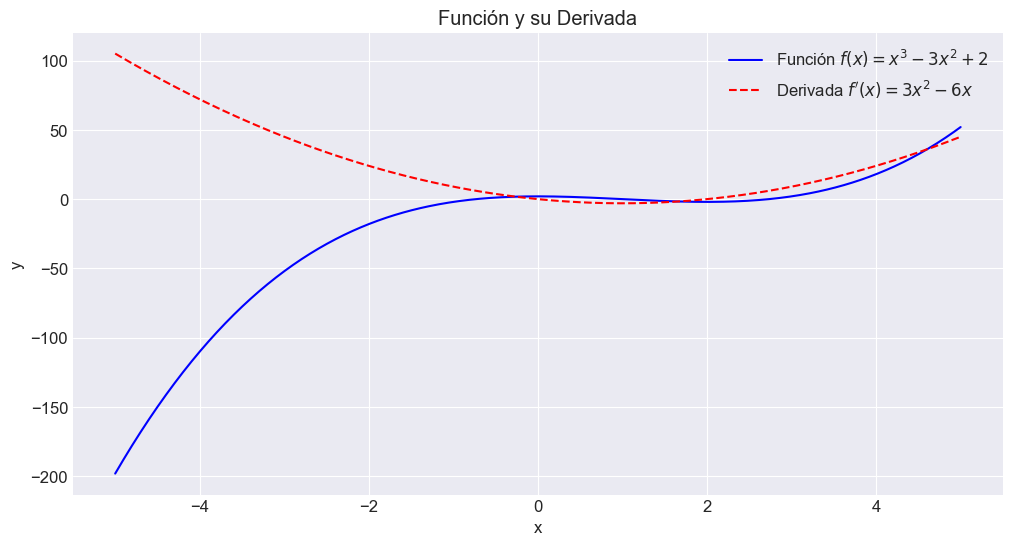

In [6]:
def plot_function_and_derivative(f):
    x_var = symbols('x')
    df = diff(f, x_var)
    
    # Convertir a funciones numéricas
    f_lamb = lambdify(x_var, f, 'numpy')
    df_lamb = lambdify(x_var, df, 'numpy')
    
    # Crear datos
    x_vals = np.linspace(-5, 5, 500)
    
    # Gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, f_lamb(x_vals), 'b-', label=f'Función $f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, df_lamb(x_vals), 'r--', label=f"Derivada $f'(x) = {sp.latex(df)}$")
    plt.title('Función y su Derivada')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo
f_example = x**3 - 3*x**2 + 2
plot_function_and_derivative(f_example)


## Resumen Teórico

| **Concepto**               | **Descripción Matemática**                  | **Interpretación Geométrica**          |
|----------------------------|---------------------------------------------|----------------------------------------|
| Cociente diferencial       | $\frac{f(x+h)-f(x)}{h}$                    | Pendiente de la recta secante          |
| Derivada                   | $\lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$     | Pendiente de la recta tangente         |
| Notación                   | $f'(x)$ o $\frac{df}{dx}$                  | Razón de cambio instantáneo            |
| Aplicaciones               | - Velocidad instantánea                    | - Optimización                         |
|                            | - Tasa de crecimiento                      | - Análisis de funciones                |


=== Análisis completo ===
Función: f(x) = \sin{\left(x \right)}
Punto de análisis: x = 0.7853981633974483

Proceso de cálculo:
1. f(x + h) = \sin{\left(h + x \right)}
2. Cociente diferencial = rac{\sin{\left(h + x \right)} - \sin{\left(x \right)}}{h}
3. Simplificado = \frac{- \sin{\left(x \right)} + \sin{\left(h + x \right)}}{h}
4. Derivada: f'(x) = \cos{\left(x \right)}

Pendiente en x = 0.7853981633974483: f'(0.7853981633974483) = 0.707106781186548


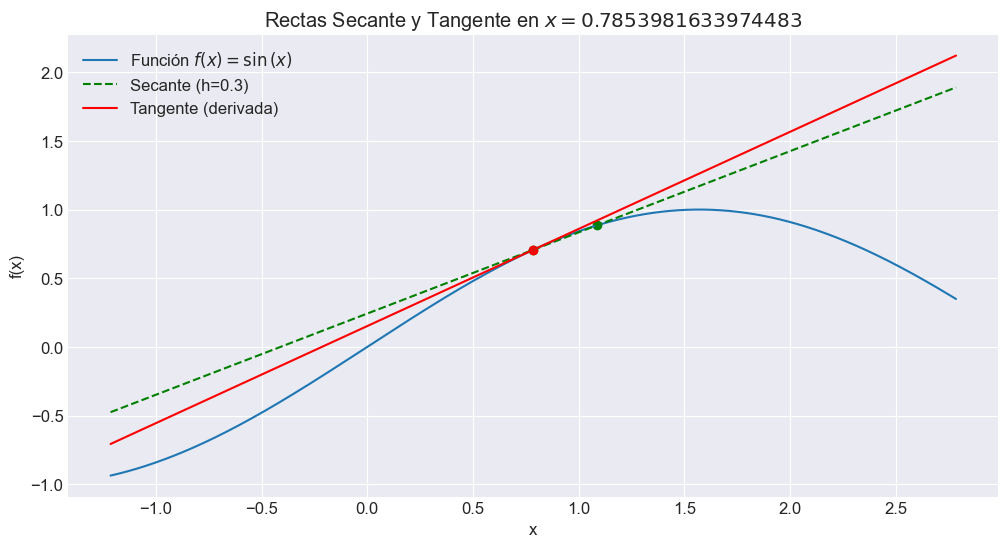

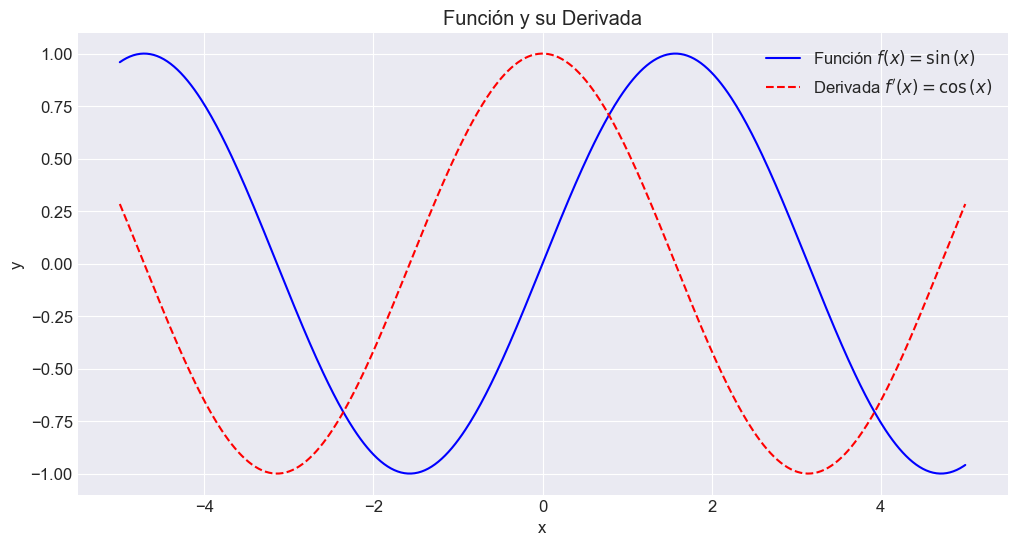

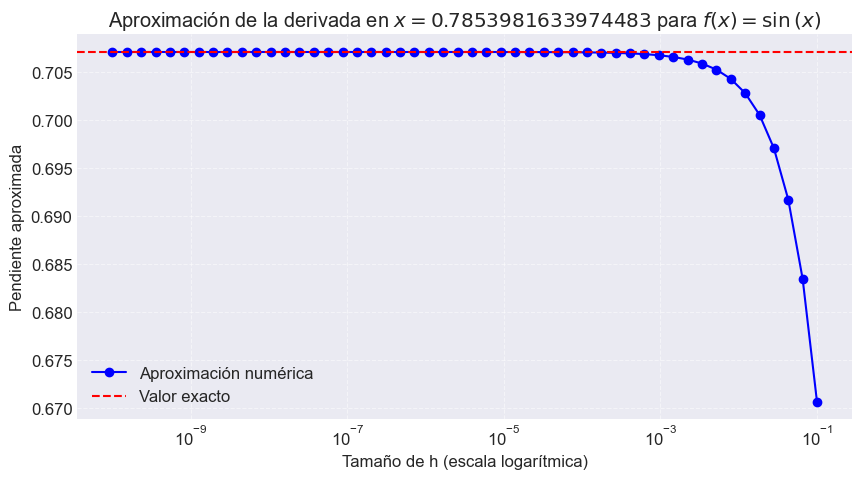

[np.float64(0.6706029729039886),
 np.float64(0.6834470712298433),
 np.float64(0.6917177612512102),
 np.float64(0.6970731626288998),
 np.float64(0.7005542756858372),
 np.float64(0.7028230135626121),
 np.float64(0.7043042210397201),
 np.float64(0.7052724028629579),
 np.float64(0.7059057403434407),
 np.float64(0.7063202511801465),
 np.float64(0.7065916343789624),
 np.float64(0.7067693502418212),
 np.float64(0.7068857447672142),
 np.float64(0.7069619843163035),
 np.float64(0.7070119250859782),
 np.float64(0.7070446401620377),
 np.float64(0.7070660716488674),
 np.float64(0.7070801115581505),
 np.float64(0.7070893093023701),
 np.float64(0.7070953349194935),
 np.float64(0.7070992824350566),
 np.float64(0.7071018685512481),
 np.float64(0.7071035627853923),
 np.float64(0.7071046727117299),
 np.float64(0.7071053998638624),
 np.float64(0.7071058762392399),
 np.float64(0.707106188297356),
 np.float64(0.7071063927277208),
 np.float64(0.7071065267540894),
 np.float64(0.7071066145208935),
 np.float64

In [8]:
# Ejemplo final integrando todos los conceptos
x_final = symbols('x')
f_final = sin(x)  # Cambiar por cualquier función para explorar
a_point = np.pi/4

print("=== Análisis completo ===")
print(f"Función: f(x) = {sp.latex(f_final)}")
print(f"Punto de análisis: x = {a_point}")

# Calcular derivada formal
derivada = derivative_by_definition(f_final, a_point)

# Visualizar rectas
plot_tangent_secant(f_final, a_point, h=0.3)

# Gráfico función y derivada
plot_function_and_derivative(f_final)

# Convergencia numérica
h_values = np.logspace(-1, -10, 50)
numerical_derivative(f_final, a_point, h_values)
